This is the primary notebook dealing with the food data analyses. The three files are pulled in, and the specific fields are cleaned up and cut for ease of use. Macro-level counts of gender and age ranges are tabulated for use in later calculations. After the two primary data sets (foodconsumption and demographics) are merged, filters are applied to pull out only the relevant data for the four food categories that we analyzed (asparagus, beef, chicken, and dairy). A variety of calculations and analyses were then run on the smaller, filtered data set. 

In [311]:
# import the libraries needed for this set of work

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [312]:
# import the three food files

foodconsumption_data = pd.read_csv('./2013_2014day1data.csv')
foodcode_data = pd.read_csv('./Foodcode_2013_2014.csv')
demographics_data = pd.read_csv('./Demographics_2013_2014.csv')

In [313]:
# change SEQN to an integer from a float, which was causing rounding errors

foodconsumption_data["SEQN"] = foodconsumption_data["SEQN"].apply(np.int64)
foodconsumption_data.head()

,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
0,73563,31417.217100,40735.782420,2.0,4,54,1,2,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73563,31417.217100,40735.782420,6.0,4,54,1,2,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73627,3081.170095,2298.341202,1.0,4,49,1,2,21,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,73627,3081.170095,2298.341202,2.0,4,49,1,2,21,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,73627,3081.170095,2298.341202,3.0,4,49,1,2,21,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
# pull out the three key fields from the food diary data set; change the column headers to something understandable

food_data_abridged = foodconsumption_data[["SEQN", "DR1IFDCD", "DR1IGRMS"]]
food_data_abridged.columns = ['PersonID', 'FoodCode', 'GramsEaten']
food_data_abridged.head()

,PersonID,FoodCode,GramsEaten
0,73563,11000000,0.0
1,73563,11000000,0.0
2,73627,11000000,0.0
3,73627,11000000,0.0
4,73627,11000000,0.0


In [315]:
demographics_data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557.0,8.0,2.0,1.0,69.0,0,4,4,1,0,...,3,4,0,13281.237386,13481.042095,1,112,4,4,0.84
1,73558.0,8.0,2.0,1.0,54.0,0,3,3,1,0,...,3,1,1,23682.057386,24471.769625,1,108,7,7,1.78
2,73559.0,8.0,2.0,1.0,72.0,0,3,3,2,0,...,4,1,3,57214.803319,57193.285376,1,109,10,10,4.51
3,73560.0,8.0,2.0,1.0,9.0,0,3,3,1,119,...,3,1,4,55201.178592,55766.512438,2,109,9,9,2.52
4,73561.0,8.0,2.0,2.0,73.0,0,3,3,1,0,...,5,1,5,63709.667069,65541.871229,2,116,15,15,5.00


In [316]:
# change the SEQN type, gender, and age to int, as I did for the foodconsumption_data file

demographics_data["SEQN"] = demographics_data["SEQN"].apply(np.int64)
demographics_data["RIDAGEYR"] = demographics_data["RIDAGEYR"].apply(np.int64)
demographics_data["RIAGENDR"] = demographics_data["RIAGENDR"].apply(np.int64)
demographics_data.head()
# type(demographics_data)    # type = df

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8.0,2.0,1,69,0,4,4,1,0,...,3,4,0,13281.237386,13481.042095,1,112,4,4,0.84
1,73558,8.0,2.0,1,54,0,3,3,1,0,...,3,1,1,23682.057386,24471.769625,1,108,7,7,1.78
2,73559,8.0,2.0,1,72,0,3,3,2,0,...,4,1,3,57214.803319,57193.285376,1,109,10,10,4.51
3,73560,8.0,2.0,1,9,0,3,3,1,119,...,3,1,4,55201.178592,55766.512438,2,109,9,9,2.52
4,73561,8.0,2.0,2,73,0,3,3,1,0,...,5,1,5,63709.667069,65541.871229,2,116,15,15,5.00


In [317]:
demographics_data_abridged = demographics_data[["SEQN", "RIAGENDR", "RIDAGEYR"]]
demographics_data_abridged.columns = ['PersonID', 'Gender', 'Age']
demographics_data_abridged.head()

,PersonID,Gender,Age
0,73557,1,69
1,73558,1,54
2,73559,1,72
3,73560,1,9
4,73561,2,73


The next two functions replace the integers for gender and age with strings for easier categorical manipulation.

In [318]:
# replace the gender numbers (1, 2) with type (male, female)

def gender_type(gender_code):
    result = "Unknown"
    if (gender_code) == 1 :
        result = 'Male'
    elif (gender_code) == 2: 
        result = "Female"
    return result

demographics_data_abridged['GenderType'] = demographics_data_abridged['Gender'].apply(lambda x: gender_type(x))
# demographics_data_updated = demographics_data_abridged.Gender.apply[demographics_data_update]
demographics_data_abridged.head()
# demographics_data_updated

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PersonID,Gender,Age,GenderType
0,73557,1,69,Male
1,73558,1,54,Male
2,73559,1,72,Male
3,73560,1,9,Male
4,73561,2,73,Female


In [319]:
# add in age ranges for each age

def age_filter(age_cohort):
    result = '0 - 15'
    if (age_cohort < 16) :
        result = '0 - 15'
    elif (age_cohort <= 22) :
        result = '16 - 22'
    elif (age_cohort <= 29) :
        result = '23 - 29'
    elif (age_cohort <= 36) :
        result = '30 - 36'
    elif (age_cohort <= 43) :
        result = '37 - 43'
    elif (age_cohort <= 50) :
        result = '44 - 50'
    elif (age_cohort <= 57) :
        result = '51 - 57'
    elif (age_cohort <= 64) :
        result = '58 - 64'
    elif (age_cohort <= 71) :
        result = '65 - 71'
    elif (age_cohort <= 78) :
        result = '72 - 78'
    elif (79 <= age_cohort) :
        result = '79 + '
    return result

demographics_data_abridged['AgeRange'] = demographics_data_abridged['Age'].apply(lambda x: age_filter(x))
demographics_data_abridged.head()

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PersonID,Gender,Age,GenderType,AgeRange
0,73557,1,69,Male,65 - 71
1,73558,1,54,Male,51 - 57
2,73559,1,72,Male,72 - 78
3,73560,1,9,Male,0 - 15
4,73561,2,73,Female,72 - 78


Now the data sets will be merged, population counts taken, then the data filtered on our four food categories so that the analyses can begin. 

In [320]:
# merging the demographics data with the food consumption data

personfoodconsumed = pd.merge(demographics_data_abridged, food_data_abridged, how='inner', on='PersonID')
personfoodconsumed.head(n=10)
# personfoodconsumed.count()  # 131,544

,PersonID,Gender,Age,GenderType,AgeRange,FoodCode,GramsEaten
0,73557,1,69,Male,65 - 71,27510690,173.50
1,73557,1,69,Male,65 - 71,32202075,84.00
2,73557,1,69,Male,65 - 71,61119010,131.00
3,73557,1,69,Male,65 - 71,61210250,449.50
4,73557,1,69,Male,65 - 71,63141140,220.50
5,73557,1,69,Male,65 - 71,71201050,8.50
6,73557,1,69,Male,65 - 71,91107000,2.00
7,73557,1,69,Male,65 - 71,91715100,42.75
8,73557,1,69,Male,65 - 71,92101000,359.10
9,73557,1,69,Male,65 - 71,92410310,620.00


In [321]:
# to get gender consumption averages, I need to know the counts of men and women (uniquely) who responded to the survey
# this is the macro level number of people, before filtering just on the four food categories
# provides unique number of male and female respondents to the survey

# personfoodconsumed.Gender.value_counts()
population_data = personfoodconsumed.groupby('GenderType')['PersonID'].nunique().reset_index()
population_data.columns = ['GenderType', 'PopulationCount']
population_data
# provides unique number of male and female respondents to the survey

,GenderType,PopulationCount
0,Female,4418
1,Male,4243
2,Unknown,1


In [322]:
# to get age range consumption averages, I need to know the counts of each age (uniquely) who responded to the survey
# this is the macro level number of people, before filtering just on the four food categories
# provides unique number of each age of respondents to the survey

# agerange_data = personfoodconsumed.groupby('Age')['PersonID'].nunique().reset_index()
# agerange_data.columns = ['Age', 'PopulationCount']
# agerange_data.head(n=10)
# agerange_data['PopulationCount'].sum()   #8662

agerange_data = personfoodconsumed.groupby('AgeRange')['PersonID'].nunique().reset_index()
agerange_data.columns = ['AgeRange', 'PopulationCount']
agerange_data

,AgeRange,PopulationCount
0,0 - 15,2983
1,16 - 22,908
2,23 - 29,578
3,30 - 36,637
4,37 - 43,625
5,44 - 50,617
6,51 - 57,602
7,58 - 64,606
8,65 - 71,492
9,72 - 78,319


In [323]:
# consolidating the four different filters into one to apply to the data set

def four_food_filter(item_code):
    result = False
    if ((10000000 <= item_code) and (item_code <= 19999999)) and (item_code not in range(11710000, 11740551)) :
        result = True
    elif ((21000100 <= item_code) and (item_code <= 21701020)) :
        result = True
    elif ((24100000 <= item_code) and (item_code <= 24198840)) :
        result = True
    elif ((75202000 <= item_code) and (item_code <= 75202036)) :
        result = True
    return result

# food_data_filter = food_data_abridged.groupby('Food Code').apply(four_food_filter)
food_data_filter = personfoodconsumed.FoodCode.apply(four_food_filter)
food_data_filtered = personfoodconsumed[food_data_filter]
food_data_filtered.head()
# food_data_filtered.count()  #19,447 rows that contain the four food categories


,PersonID,Gender,Age,GenderType,AgeRange,FoodCode,GramsEaten
11,73558,1,54,Male,51 - 57,11111000,152.50
12,73558,1,54,Male,51 - 57,11111000,366.00
19,73559,1,72,Male,72 - 78,11113000,183.00
20,73559,1,72,Male,72 - 78,14201010,210.00
46,73560,1,9,Male,0 - 15,11112210,167.75


In [324]:
# change the filter from food code types to food categories to make the sorting and comparisons easiers

def food_code_type(item_code):
    result = False
    if ((10000000 <= item_code) and (item_code <= 19999999)) and (item_code not in range(11710000, 11740551)) :
        result = 'DAIRY'
    elif ((21000100 <= item_code) and (item_code <= 21701020)) :
        result = 'BEEF'
    elif ((24100000 <= item_code) and (item_code <= 24198840)) :
        result = 'CHICKEN'
    elif ((75202000 <= item_code) and (item_code <= 75202036)) :
        result = 'ASPARAGUS'
    return result

food_data_filtered['FoodType'] = food_data_filtered['FoodCode'].apply(lambda x: food_code_type(x))
food_data_filtered.head()


/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PersonID,Gender,Age,GenderType,AgeRange,FoodCode,GramsEaten,FoodType
11,73558,1,54,Male,51 - 57,11111000,152.50,DAIRY
12,73558,1,54,Male,51 - 57,11111000,366.00,DAIRY
19,73559,1,72,Male,72 - 78,11113000,183.00,DAIRY
20,73559,1,72,Male,72 - 78,14201010,210.00,DAIRY
46,73560,1,9,Male,0 - 15,11112210,167.75,DAIRY


In [325]:
# 'Gender', 'Age', and 'FoodCode' are no longer needed for the analysis, so they get cut out. 

food_data_filtered = food_data_filtered[['PersonID', 'GenderType', 'AgeRange', 'FoodType', 'GramsEaten']]
food_data_filtered.head()

,PersonID,GenderType,AgeRange,FoodType,GramsEaten
11,73558,Male,51 - 57,DAIRY,152.50
12,73558,Male,51 - 57,DAIRY,366.00
19,73559,Male,72 - 78,DAIRY,183.00
20,73559,Male,72 - 78,DAIRY,210.00
46,73560,Male,0 - 15,DAIRY,167.75


Beginning to do the calculations and analyses.

In [326]:
# create a new df to reflect the total amount of each food type consumed

foodcodegrouping = food_data_filtered.groupby("FoodType").apply(lambda x: x['GramsEaten'].sum())
foodcodegrouping = foodcodegrouping.to_frame()
foodcodegrouping.columns = ['FoodTypeSum']
foodcodegrouping

,FoodTypeSum
FoodType,
ASPARAGUS,6888.50
BEEF,135668.04
CHICKEN,254126.24
DAIRY,1914695.88


In [327]:
# create another column containing the number of unique people who ate each of the food categories

foodcodegrouping['PersonCount'] = food_data_filtered.groupby("FoodType").PersonID.nunique()
foodcodegrouping

,FoodTypeSum,PersonCount
FoodType,,
ASPARAGUS,6888.50,64
BEEF,135668.04,1259
CHICKEN,254126.24,2093
DAIRY,1914695.88,6806


In [328]:
# calculate the average of each type of food consumed, and create a new column with this information
# the average is based on the entire population (8662), not on the filtered food categories data
# the PersonCount column here is actually now irrelevant

foodcodegrouping['AvgTypeConsumed'] = foodcodegrouping['FoodTypeSum'] / 8662
foodcodegrouping

,FoodTypeSum,PersonCount,AvgTypeConsumed
FoodType,,,
ASPARAGUS,6888.50,64,0.795255
BEEF,135668.04,1259,15.662438
CHICKEN,254126.24,2093,29.338056
DAIRY,1914695.88,6806,221.045472


In [329]:
# create new df grouped by person ID and food type, then grams eaten
# provides the amount of food per category consumed in a day by each person

food_data_filtered.head()
persongrouping = food_data_filtered.groupby(['PersonID','FoodType'])['GramsEaten'].sum().reset_index()
persongrouping.head()    

# persongrouping.PersonID.nunique().count()    # 7397

,PersonID,FoodType,GramsEaten
0,73558,DAIRY,518.50
1,73559,DAIRY,393.00
2,73560,BEEF,141.37
3,73560,DAIRY,535.08
4,73561,DAIRY,2.52


In [330]:
food_data_filtered.head()

,PersonID,GenderType,AgeRange,FoodType,GramsEaten
11,73558,Male,51 - 57,DAIRY,152.50
12,73558,Male,51 - 57,DAIRY,366.00
19,73559,Male,72 - 78,DAIRY,183.00
20,73559,Male,72 - 78,DAIRY,210.00
46,73560,Male,0 - 15,DAIRY,167.75


In [337]:
# group by gender and food type , sum the grams eaten 

groupbygenderfoodtype = food_data_filtered.groupby(['GenderType', 'FoodType'])['GramsEaten'].sum()
groupbygenderfoodtype

GenderType  FoodType 
Female      ASPARAGUS       3688.38
            BEEF           51243.92
            CHICKEN       105368.52
            DAIRY         879088.88
Male        ASPARAGUS       3200.12
            BEEF           84424.12
            CHICKEN       148757.72
            DAIRY        1035607.00
Name: GramsEaten, dtype: float64

In [338]:
# group by age range and food type , sum the grams eaten 

groupbyagerangefoodtype = food_data_filtered.groupby(['AgeRange', 'FoodType'])['GramsEaten'].sum()
groupbyagerangefoodtype

AgeRange  FoodType 
0 - 15    ASPARAGUS       688.35
          BEEF          26095.45
          CHICKEN       71941.81
          DAIRY        851438.50
16 - 22   ASPARAGUS       127.80
          BEEF          18725.93
          CHICKEN       36565.45
          DAIRY        191580.70
23 - 29   ASPARAGUS      1054.85
          BEEF          15532.45
          CHICKEN       23818.57
          DAIRY        101343.24
30 - 36   ASPARAGUS       341.80
          BEEF          13804.27
          CHICKEN       23134.39
          DAIRY        115012.99
37 - 43   ASPARAGUS       774.15
          BEEF          13833.00
          CHICKEN       19302.96
          DAIRY        108652.04
44 - 50   ASPARAGUS       631.78
          BEEF          12720.21
          CHICKEN       16742.39
          DAIRY        112712.32
51 - 57   ASPARAGUS       967.65
          BEEF          10611.70
          CHICKEN       18591.48
          DAIRY        104347.32
58 - 64   ASPARAGUS       961.97
          BEEF         

In [393]:
# creating the RowType allowed us to quickly access the multiple indices (GenderType, FoodType) that were created by 
# the double groupby above; RowType ends up being a tuple(GenderType, FoodType)
# there is probably a simpler way to get to this index information, such as using an 'unstack' command

df1 = groupbygenderfoodtype.to_frame()
df1['RowType'] = df1['GramsEaten'].index
df1

GramsEaten              RowType
GenderType FoodType                                  
Female     ASPARAGUS     3688.38  (Female, ASPARAGUS)
           BEEF         51243.92       (Female, BEEF)
           CHICKEN     105368.52    (Female, CHICKEN)
           DAIRY       879088.88      (Female, DAIRY)
Male       ASPARAGUS     3200.12    (Male, ASPARAGUS)
           BEEF         84424.12         (Male, BEEF)
           CHICKEN     148757.72      (Male, CHICKEN)
           DAIRY      1035607.00        (Male, DAIRY)

In [394]:
# apply the same .index method to pull out AgeRange and FoodType indices into the RowType column

df2 = groupbyagerangefoodtype.to_frame()
df2['RowType'] = df2['GramsEaten'].index
df2

GramsEaten               RowType
AgeRange FoodType                                   
0 - 15   ASPARAGUS      688.35   (0 - 15, ASPARAGUS)
         BEEF         26095.45        (0 - 15, BEEF)
         CHICKEN      71941.81     (0 - 15, CHICKEN)
         DAIRY       851438.50       (0 - 15, DAIRY)
16 - 22  ASPARAGUS      127.80  (16 - 22, ASPARAGUS)
         BEEF         18725.93       (16 - 22, BEEF)
         CHICKEN      36565.45    (16 - 22, CHICKEN)
         DAIRY       191580.70      (16 - 22, DAIRY)
23 - 29  ASPARAGUS     1054.85  (23 - 29, ASPARAGUS)
         BEEF         15532.45       (23 - 29, BEEF)
         CHICKEN      23818.57    (23 - 29, CHICKEN)
         DAIRY       101343.24      (23 - 29, DAIRY)
30 - 36  ASPARAGUS      341.80  (30 - 36, ASPARAGUS)
         BEEF         13804.27       (30 - 36, BEEF)
         CHICKEN      23134.39    (30 - 36, CHICKEN)
         DAIRY       115012.99      (30 - 36, DAIRY)
37 - 43  ASPARAGUS      774.15  (37 - 43, ASPARAGUS)
         BEEF         13833.00       (37 - 43, BEEF)
         CHICKEN      19302.96    (37 - 43, CHICKEN)
         DAIRY       108652.04      (37 - 43, DAIRY)
44 - 50  ASPARAGUS      631.78  (44 - 50, ASPARAGUS)
         BEEF         12720.21       (44 - 50, BEEF)
         CHICKEN      16742.39    (44 - 50, CHICKEN)
         DAIRY       112712.32      (44 - 50, DAIRY)
51 - 57  ASPARAGUS      967.65  (51 - 57, ASPARAGUS)
         BEEF         10611.70       (51 - 57, BEEF)
         CHICKEN      18591.48    (51 - 57, CHICKEN)
         DAIRY       104347.32      (51 - 57, DAIRY)
58 - 64  ASPARAGUS      961.97  (58 - 64, ASPARAGUS)
         BEEF          7793.85       (58 - 64, BEEF)
         CHICKEN      17452.35    (58 - 64, CHICKEN)
         DAIRY       102399.01      (58 - 64, DAIRY)
65 - 71  ASPARAGUS      593.00  (65 - 71, ASPARAGUS)
         BEEF          8072.84       (65 - 71, BEEF)
         CHICKEN      13556.76    (65 - 71, CHICKEN)
         DAIRY        87095.71      (65 - 71, DAIRY)
72 - 78  ASPARAGUS      279.25  (72 - 78, ASPARAGUS)
         BEEF          3957.36       (72 - 78, BEEF)
         CHICKEN       6192.44    (72 - 78, CHICKEN)
         DAIRY        67761.19      (72 - 78, DAIRY)
79 +     ASPARAGUS      467.90    (79 + , ASPARAGUS)
         BEEF          4520.98         (79 + , BEEF)
         CHICKEN       6827.64      (79 + , CHICKEN)
         DAIRY        72352.86        (79 + , DAIRY)

In [395]:
# adding in the number of total men and women to get the gender-specific averages
# quite a pain dealing with the multi-level indexing here, so used the RowType tuple

def gender_count(gender_type):
    if gender_type == 'Female': return 4418
    else: return 4243

# df1['TotalPeople'] = [4418]*4 + [4238]*4
df1['TotalPeople'] = df1['RowType'].apply(lambda x: gender_count(x[0]))

df1['Average Grams'] = df1['GramsEaten'] / df1['TotalPeople']
df1

GramsEaten              RowType  TotalPeople  \
GenderType FoodType                                                  
Female     ASPARAGUS     3688.38  (Female, ASPARAGUS)         4418   
           BEEF         51243.92       (Female, BEEF)         4418   
           CHICKEN     105368.52    (Female, CHICKEN)         4418   
           DAIRY       879088.88      (Female, DAIRY)         4418   
Male       ASPARAGUS     3200.12    (Male, ASPARAGUS)         4243   
           BEEF         84424.12         (Male, BEEF)         4243   
           CHICKEN     148757.72      (Male, CHICKEN)         4243   
           DAIRY      1035607.00        (Male, DAIRY)         4243   

                      Average Grams  
GenderType FoodType                  
Female     ASPARAGUS       0.834853  
           BEEF           11.598895  
           CHICKEN        23.849823  
           DAIRY         198.978923  
Male       ASPARAGUS       0.754212  
           BEEF           19.897271  
           CHICKEN        35.059562  
           DAIRY         244.074240

In [396]:
# adding in the numbers within each age range to get the range-specific averages
# same process as above

def agerange_count(age_range):
    if age_range == '0 - 15': return 2983
    elif age_range == '16 - 22': return 908
    elif age_range == '23 - 29': return 578
    elif age_range == '30 - 36': return 637
    elif age_range == '37 - 43': return 625
    elif age_range == '44 - 50': return 617
    elif age_range == '51 - 57': return 602
    elif age_range == '58 - 64': return 606
    elif age_range == '65 - 71': return 492
    elif age_range == '72 - 78': return 319
    else: return 295

df2['TotalPeople'] = df2['RowType'].apply(lambda x: agerange_count(x[0]))
df2['Average Grams'] = df2['GramsEaten'] / df2['TotalPeople']
df2

GramsEaten               RowType  TotalPeople  \
AgeRange FoodType                                                   
0 - 15   ASPARAGUS      688.35   (0 - 15, ASPARAGUS)         2983   
         BEEF         26095.45        (0 - 15, BEEF)         2983   
         CHICKEN      71941.81     (0 - 15, CHICKEN)         2983   
         DAIRY       851438.50       (0 - 15, DAIRY)         2983   
16 - 22  ASPARAGUS      127.80  (16 - 22, ASPARAGUS)          908   
         BEEF         18725.93       (16 - 22, BEEF)          908   
         CHICKEN      36565.45    (16 - 22, CHICKEN)          908   
         DAIRY       191580.70      (16 - 22, DAIRY)          908   
23 - 29  ASPARAGUS     1054.85  (23 - 29, ASPARAGUS)          578   
         BEEF         15532.45       (23 - 29, BEEF)          578   
         CHICKEN      23818.57    (23 - 29, CHICKEN)          578   
         DAIRY       101343.24      (23 - 29, DAIRY)          578   
30 - 36  ASPARAGUS      341.80  (30 - 36, ASPARAGUS)          637   
         BEEF         13804.27       (30 - 36, BEEF)          637   
         CHICKEN      23134.39    (30 - 36, CHICKEN)          637   
         DAIRY       115012.99      (30 - 36, DAIRY)          637   
37 - 43  ASPARAGUS      774.15  (37 - 43, ASPARAGUS)          625   
         BEEF         13833.00       (37 - 43, BEEF)          625   
         CHICKEN      19302.96    (37 - 43, CHICKEN)          625   
         DAIRY       108652.04      (37 - 43, DAIRY)          625   
44 - 50  ASPARAGUS      631.78  (44 - 50, ASPARAGUS)          617   
         BEEF         12720.21       (44 - 50, BEEF)          617   
         CHICKEN      16742.39    (44 - 50, CHICKEN)          617   
         DAIRY       112712.32      (44 - 50, DAIRY)          617   
51 - 57  ASPARAGUS      967.65  (51 - 57, ASPARAGUS)          602   
         BEEF         10611.70       (51 - 57, BEEF)          602   
         CHICKEN      18591.48    (51 - 57, CHICKEN)          602   
         DAIRY       104347.32      (51 - 57, DAIRY)          602   
58 - 64  ASPARAGUS      961.97  (58 - 64, ASPARAGUS)          606   
         BEEF          7793.85       (58 - 64, BEEF)          606   
         CHICKEN      17452.35    (58 - 64, CHICKEN)          606   
         DAIRY       102399.01      (58 - 64, DAIRY)          606   
65 - 71  ASPARAGUS      593.00  (65 - 71, ASPARAGUS)          492   
         BEEF          8072.84       (65 - 71, BEEF)          492   
         CHICKEN      13556.76    (65 - 71, CHICKEN)          492   
         DAIRY        87095.71      (65 - 71, DAIRY)          492   
72 - 78  ASPARAGUS      279.25  (72 - 78, ASPARAGUS)          319   
         BEEF          3957.36       (72 - 78, BEEF)          319   
         CHICKEN       6192.44    (72 - 78, CHICKEN)          319   
         DAIRY        67761.19      (72 - 78, DAIRY)          319   
79 +     ASPARAGUS      467.90    (79 + , ASPARAGUS)          295   
         BEEF          4520.98         (79 + , BEEF)          295   
         CHICKEN       6827.64      (79 + , CHICKEN)          295   
         DAIRY        72352.86        (79 + , DAIRY)          295   

                    Average Grams  
AgeRange FoodType                  
0 - 15   ASPARAGUS       0.230758  
         BEEF            8.748056  
         CHICKEN        24.117268  
         DAIRY         285.430272  
16 - 22  ASPARAGUS       0.140749  
         BEEF           20.623271  
         CHICKEN        40.270319  
         DAIRY         210.991960  
23 - 29  ASPARAGUS       1.825000  
         BEEF           26.872751  
         CHICKEN        41.208599  
         DAIRY         175.334325  
30 - 36  ASPARAGUS       0.536578  
         BEEF           21.670754  
         CHICKEN        36.317724  
         DAIRY         180.554144  
37 - 43  ASPARAGUS       1.238640  
         BEEF           22.132800  
         CHICKEN        30.884736  
         DAIRY         173.843264  
44 - 50  ASPARAGUS       1.023955  
         BEEF    

In [397]:
# creating a dictionary for the carbon footprint of our food categories to use for calculations
# Emissions Factor in (kg CO₂ eq/kg); source: Less Beef, Less Carbon, NRDC, March 2017
# https://www.nrdc.org/sites/default/files/less-beef-less-carbon-ip.pdf
# dairy isn't listed as a category, so I'm creating an average for dairy based on all the dairy listings in the above source

foodcarbonamt = {'ASPARAGUS': 8.87, 'BEEF': 26.45, 'CHICKEN': 5.05, 'DAIRY': 6.61}
print(foodcarbonamt)
foodcarbonamt['BEEF']

{'DAIRY': 6.61, 'BEEF': 26.45, 'CHICKEN': 5.05, 'ASPARAGUS': 8.87}


26.45

In [398]:
# calculate the carbon emissions for each food group
df1['AvgCO2perKg'] = (df1['Average Grams'] * 1000) / df1['RowType'].apply(lambda x: foodcarbonamt[x[1]])
df1

GramsEaten              RowType  TotalPeople  \
GenderType FoodType                                                  
Female     ASPARAGUS     3688.38  (Female, ASPARAGUS)         4418   
           BEEF         51243.92       (Female, BEEF)         4418   
           CHICKEN     105368.52    (Female, CHICKEN)         4418   
           DAIRY       879088.88      (Female, DAIRY)         4418   
Male       ASPARAGUS     3200.12    (Male, ASPARAGUS)         4243   
           BEEF         84424.12         (Male, BEEF)         4243   
           CHICKEN     148757.72      (Male, CHICKEN)         4243   
           DAIRY      1035607.00        (Male, DAIRY)         4243   

                      Average Grams   AvgCO2perKg  
GenderType FoodType                                
Female     ASPARAGUS       0.834853     94.120955  
           BEEF           11.598895    438.521566  
           CHICKEN        23.849823   4722.737317  
           DAIRY         198.978923  30102.711436  
Male       ASPARAGUS       0.754212     85.029497  
           BEEF           19.897271    752.259766  
           CHICKEN        35.059562   6942.487452  
           DAIRY         244.074240  36924.998476

In [399]:
# calculate the carbon emissions for each food group

df1['Daily CO2'] = (df1['Average Grams'] / 1000) * df1['RowType'].apply(lambda x: foodcarbonamt[x[1]])
df1

GramsEaten              RowType  TotalPeople  \
GenderType FoodType                                                  
Female     ASPARAGUS     3688.38  (Female, ASPARAGUS)         4418   
           BEEF         51243.92       (Female, BEEF)         4418   
           CHICKEN     105368.52    (Female, CHICKEN)         4418   
           DAIRY       879088.88      (Female, DAIRY)         4418   
Male       ASPARAGUS     3200.12    (Male, ASPARAGUS)         4243   
           BEEF         84424.12         (Male, BEEF)         4243   
           CHICKEN     148757.72      (Male, CHICKEN)         4243   
           DAIRY      1035607.00        (Male, DAIRY)         4243   

                      Average Grams   AvgCO2perKg  Daily CO2  
GenderType FoodType                                           
Female     ASPARAGUS       0.834853     94.120955   0.007405  
           BEEF           11.598895    438.521566   0.306791  
           CHICKEN        23.849823   4722.737317   0.120442  
           DAIRY         198.978923  30102.711436   1.315251  
Male       ASPARAGUS       0.754212     85.029497   0.006690  
           BEEF           19.897271    752.259766   0.526283  
           CHICKEN        35.059562   6942.487452   0.177051  
           DAIRY         244.074240  36924.998476   1.613331

In [400]:
# calculate the carbon emissions for each food group

df2['Daily CO2'] = (df2['Average Grams'] / 1000) * df2['RowType'].apply(lambda x: foodcarbonamt[x[1]])
df2['Yearly CO2'] = df2['Daily CO2'] * 365
df2

GramsEaten               RowType  TotalPeople  \
AgeRange FoodType                                                   
0 - 15   ASPARAGUS      688.35   (0 - 15, ASPARAGUS)         2983   
         BEEF         26095.45        (0 - 15, BEEF)         2983   
         CHICKEN      71941.81     (0 - 15, CHICKEN)         2983   
         DAIRY       851438.50       (0 - 15, DAIRY)         2983   
16 - 22  ASPARAGUS      127.80  (16 - 22, ASPARAGUS)          908   
         BEEF         18725.93       (16 - 22, BEEF)          908   
         CHICKEN      36565.45    (16 - 22, CHICKEN)          908   
         DAIRY       191580.70      (16 - 22, DAIRY)          908   
23 - 29  ASPARAGUS     1054.85  (23 - 29, ASPARAGUS)          578   
         BEEF         15532.45       (23 - 29, BEEF)          578   
         CHICKEN      23818.57    (23 - 29, CHICKEN)          578   
         DAIRY       101343.24      (23 - 29, DAIRY)          578   
30 - 36  ASPARAGUS      341.80  (30 - 36, ASPARAGUS)          637   
         BEEF         13804.27       (30 - 36, BEEF)          637   
         CHICKEN      23134.39    (30 - 36, CHICKEN)          637   
         DAIRY       115012.99      (30 - 36, DAIRY)          637   
37 - 43  ASPARAGUS      774.15  (37 - 43, ASPARAGUS)          625   
         BEEF         13833.00       (37 - 43, BEEF)          625   
         CHICKEN      19302.96    (37 - 43, CHICKEN)          625   
         DAIRY       108652.04      (37 - 43, DAIRY)          625   
44 - 50  ASPARAGUS      631.78  (44 - 50, ASPARAGUS)          617   
         BEEF         12720.21       (44 - 50, BEEF)          617   
         CHICKEN      16742.39    (44 - 50, CHICKEN)          617   
         DAIRY       112712.32      (44 - 50, DAIRY)          617   
51 - 57  ASPARAGUS      967.65  (51 - 57, ASPARAGUS)          602   
         BEEF         10611.70       (51 - 57, BEEF)          602   
         CHICKEN      18591.48    (51 - 57, CHICKEN)          602   
         DAIRY       104347.32      (51 - 57, DAIRY)          602   
58 - 64  ASPARAGUS      961.97  (58 - 64, ASPARAGUS)          606   
         BEEF          7793.85       (58 - 64, BEEF)          606   
         CHICKEN      17452.35    (58 - 64, CHICKEN)          606   
         DAIRY       102399.01      (58 - 64, DAIRY)          606   
65 - 71  ASPARAGUS      593.00  (65 - 71, ASPARAGUS)          492   
         BEEF          8072.84       (65 - 71, BEEF)          492   
         CHICKEN      13556.76    (65 - 71, CHICKEN)          492   
         DAIRY        87095.71      (65 - 71, DAIRY)          492   
72 - 78  ASPARAGUS      279.25  (72 - 78, ASPARAGUS)          319   
         BEEF          3957.36       (72 - 78, BEEF)          319   
         CHICKEN       6192.44    (72 - 78, CHICKEN)          319   
         DAIRY        67761.19      (72 - 78, DAIRY)          319   
79 +     ASPARAGUS      467.90    (79 + , ASPARAGUS)          295   
         BEEF          4520.98         (79 + , BEEF)          295   
         CHICKEN       6827.64      (79 + , CHICKEN)          295   
         DAIRY        72352.86        (79 + , DAIRY)          295   

                    Average Grams  Daily CO2  Yearly CO2  
AgeRange FoodType                                         
0 - 15   ASPARAGUS       0.230758   0.002047    0.747089  
         BEEF            8.748056   0.231386   84.455916  
         CHICKEN        24.117268   0.121792   44.454154  
         DAIRY         285.430272   1.886694  688.643345  
16 - 22  ASPARAGUS       0.140749   0.001248    0.455682  
         BEEF           20.623271   0.545486  199.102213  
         CHICKEN        40.270319   0.203365   74.228266  
         DAIRY         210.991960   1.394657  509.049753  
23 - 29  ASPARAGUS       1.825000   0.016188    5.908529  
         BEEF           26.872751   0.710784  259.436255  
         CHICKEN        41.208599   0.208103   75.957749  
         DAIRY         175.334325   1.158960  423.020360  
30 - 36  ASPARAGUS 

Developing the graphs for the food data, this involved creating sub-dataframes of interest and "unstacking" the multidimensional data.

In [388]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [379]:
df4 = df2["Daily CO2"].to_frame()
CO2_day_foods_ages = df4.unstack(level=-1)
CO2_day_foods_ages.head()

Daily CO2                              
FoodType ASPARAGUS      BEEF   CHICKEN     DAIRY
AgeRange                                        
0 - 15    0.002047  0.231386  0.121792  1.886694
16 - 22   0.001248  0.545486  0.203365  1.394657
23 - 29   0.016188  0.710784  0.208103  1.158960
30 - 36   0.004759  0.573191  0.183405  1.193463
37 - 43   0.010987  0.585413  0.155968  1.149104

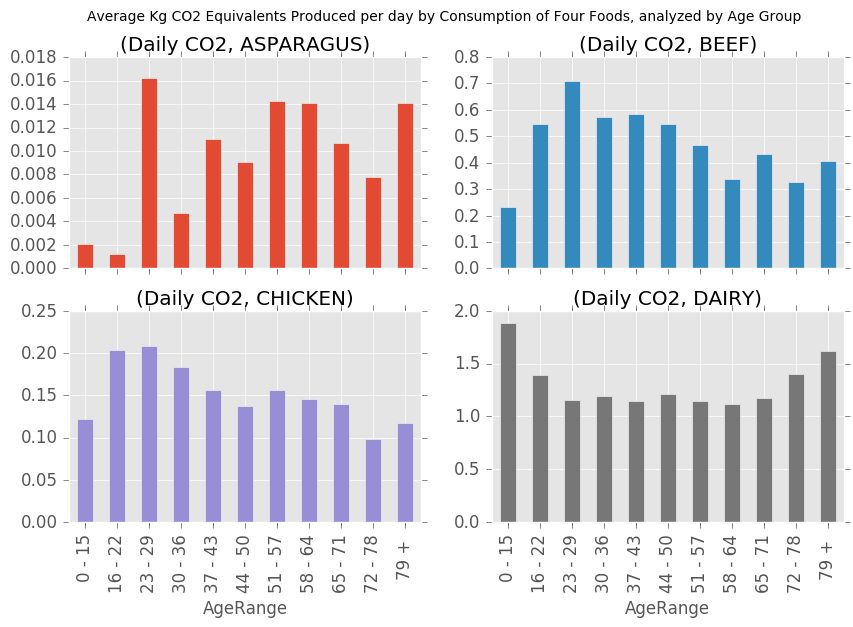

In [413]:
CO2_day_foods_ages.plot(kind = 'bar', subplots=True, layout=(2,2), legend=False, figsize=(10,6), title="Average Kg CO2 Equivalents Produced per day by Consumption of Four Foods, analyzed by Age Group", fontsize=12)
plt.savefig('CO2perDay_fourfoods_subplot_age.png')

In [381]:
df5 = df1["Daily CO2"].to_frame()
df5.head()

Daily CO2
GenderType FoodType            
Female     ASPARAGUS   0.007405
           BEEF        0.306791
           CHICKEN     0.120442
           DAIRY       1.315251
Male       ASPARAGUS   0.006690

In [382]:
CO2_day_foods_gender = df5.unstack(level=-1)
CO2_day_foods_gender

Daily CO2                              
FoodType   ASPARAGUS      BEEF   CHICKEN     DAIRY
GenderType                                        
Female      0.007405  0.306791  0.120442  1.315251
Male        0.006690  0.526283  0.177051  1.613331

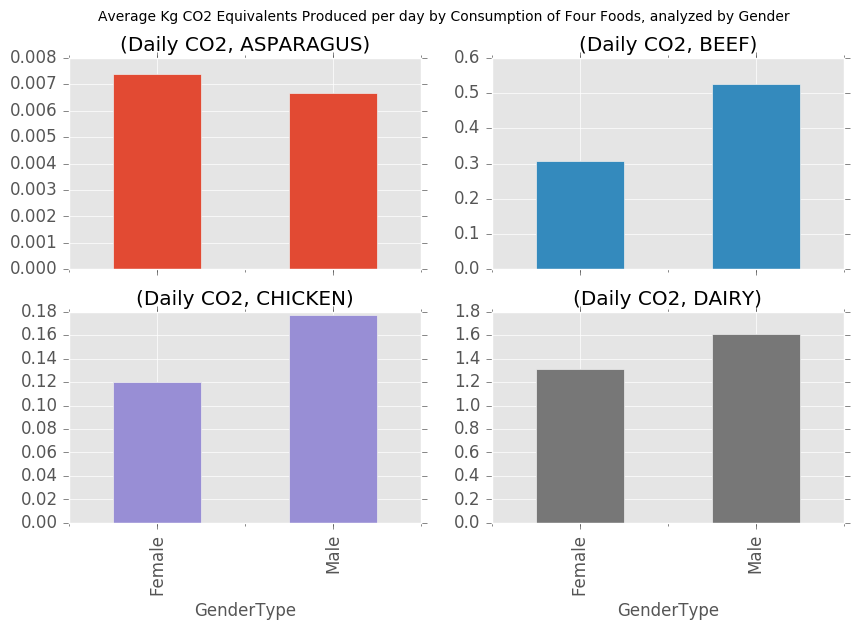

In [409]:
CO2_day_foods_gender.plot(kind = 'bar', subplots=True, layout=(2,2), legend=False, figsize=(10,6), title="Average Kg CO2 Equivalents Produced per day by Consumption of Four Foods, analyzed by Gender", fontsize=12)
plt.savefig('CO2perDay_fourfoods_subplot_gender.png')

In [385]:
df6 = df1["Average Grams"].to_frame()
df6.head()

Average Grams
GenderType FoodType                
Female     ASPARAGUS       0.834853
           BEEF           11.598895
           CHICKEN        23.849823
           DAIRY         198.978923
Male       ASPARAGUS       0.754212

In [386]:
AverageGrams_foods_gender = df6.unstack(level=-1)
AverageGrams_foods_gender

Average Grams                                  
FoodType       ASPARAGUS       BEEF    CHICKEN       DAIRY
GenderType                                                
Female          0.834853  11.598895  23.849823  198.978923
Male            0.754212  19.897271  35.059562  244.074240

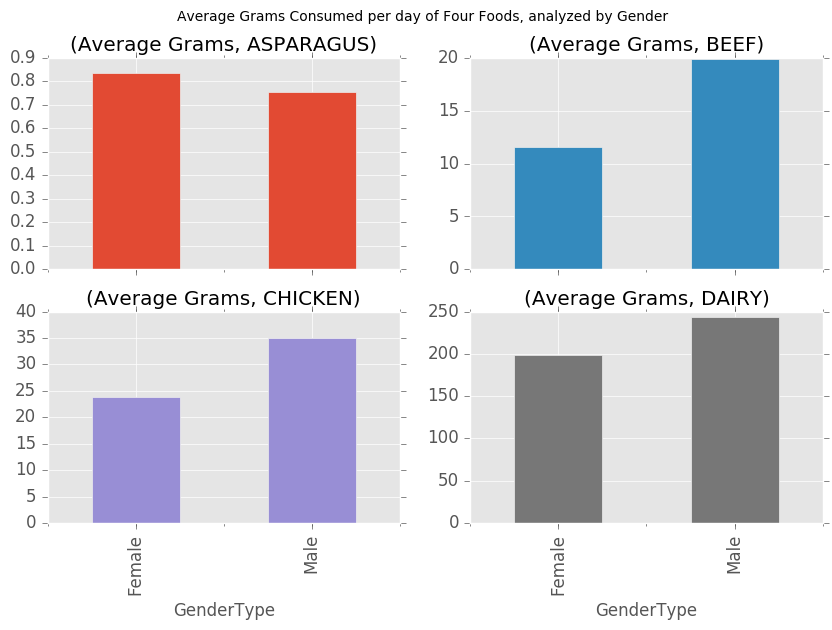

In [410]:
AverageGrams_foods_gender.plot(kind = 'bar', subplots=True, layout=(2,2), legend=False, figsize=(10,6), title="Average Grams Consumed per day of Four Foods, analyzed by Gender", fontsize=12)
plt.savefig('GramsperDay_fourfoods_subplot_gender.png')

In [389]:
df7 = df2["Average Grams"].to_frame()
df7.head()

Average Grams
AgeRange FoodType                
0 - 15   ASPARAGUS       0.230758
         BEEF            8.748056
         CHICKEN        24.117268
         DAIRY         285.430272
16 - 22  ASPARAGUS       0.140749

In [391]:
AverageGrams_foods_age = df7.unstack(level=-1)
AverageGrams_foods_age.head()

Average Grams                                  
FoodType     ASPARAGUS       BEEF    CHICKEN       DAIRY
AgeRange                                                
0 - 15        0.230758   8.748056  24.117268  285.430272
16 - 22       0.140749  20.623271  40.270319  210.991960
23 - 29       1.825000  26.872751  41.208599  175.334325
30 - 36       0.536578  21.670754  36.317724  180.554144
37 - 43       1.238640  22.132800  30.884736  173.843264

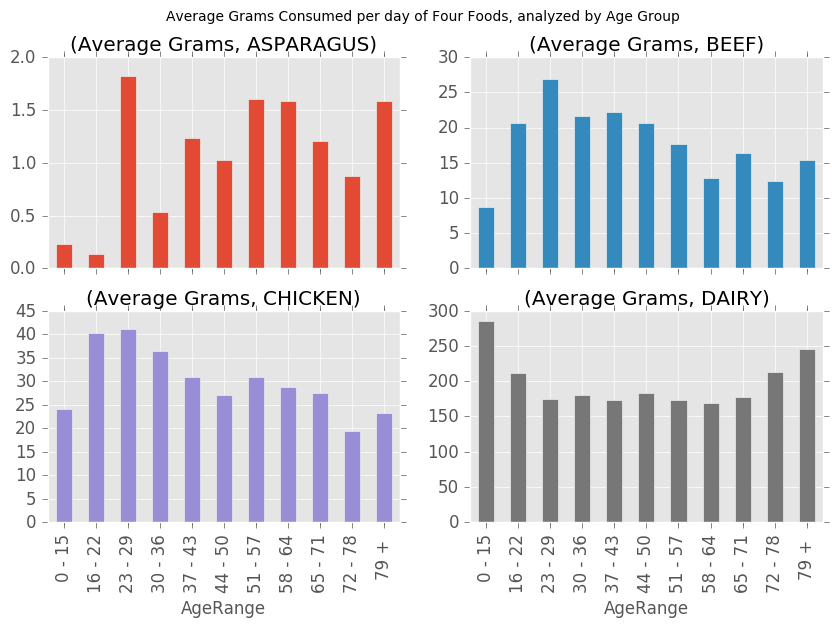

In [411]:
AverageGrams_foods_age.plot(kind = 'bar', subplots=True, layout=(2,2), legend=False, figsize=(10,6), title="Average Grams Consumed per day of Four Foods, analyzed by Age Group", fontsize=12)
plt.savefig('GramsperDay_fourfoods_subplot_age.png')

In [402]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline